In [1]:
from backtester import *

In [2]:
# read date from .csv file
path = 'FXCM/historical_prices/H1/EUR_USD_H1.csv'
data = pd.read_csv(path, parse_dates=['date'], index_col=['date'])
print(data.shape)
data.head()

(10000, 9)


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2020-01-15 22:00:00,1.11489,1.11510,1.11529,1.11482,1.11503,1.11526,1.11559,1.11502,2453
2020-01-15 23:00:00,1.11510,1.11519,1.11526,1.11495,1.11526,1.11531,1.11543,1.11508,1219
2020-01-16 00:00:00,1.11519,1.11542,1.11575,1.11519,1.11531,1.11554,1.11588,1.11530,3353
2020-01-16 01:00:00,1.11542,1.11529,1.11547,1.11525,1.11554,1.11540,1.11559,1.11536,2406
2020-01-16 02:00:00,1.11529,1.11512,1.11532,1.11502,1.11540,1.11523,1.11544,1.11514,1887


In [3]:
# compute mid price
data['midclose'] = data[['bidclose', 'askclose']].mean(axis=1)

# SMA crossover strategy
periods = (20, 100)
data['sma_short'] = data['midclose'].rolling(periods[0]).mean()
data['sma_long'] = data['midclose'].rolling(periods[1]).mean()
data['signal'] = np.where(data['sma_short'] > data['sma_long'], 1, np.where(data['sma_short'] < data['sma_long'], -1, 0))
data.dropna(inplace=True)
print(data.shape)
data.head()

(9901, 13)


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,midclose,sma_short,sma_long,signal
date,,,,,,,,,,,,,
2020-01-21 22:00:00,1.10814,1.10822,1.10843,1.10811,1.10830,1.10837,1.10872,1.10828,1586,1.108295,1.109593,1.111210,-1
2020-01-21 23:00:00,1.10822,1.10846,1.10850,1.10820,1.10837,1.10858,1.10862,1.10833,2282,1.108520,1.109532,1.111143,-1
2020-01-22 00:00:00,1.10846,1.10821,1.10863,1.10818,1.10858,1.10834,1.10875,1.10830,3927,1.108275,1.109450,1.111073,-1
2020-01-22 01:00:00,1.10821,1.10808,1.10832,1.10771,1.10834,1.10820,1.10844,1.10782,3734,1.108140,1.109380,1.111000,-1
2020-01-22 02:00:00,1.10808,1.10799,1.10818,1.10766,1.10820,1.10811,1.10830,1.10779,4017,1.108050,1.109312,1.110927,-1


In [4]:
data['signal'].value_counts()
# 1 ===> long
# -1 ===> short
# 0 ===> neutral

 1    5218
-1    4683
Name: signal, dtype: int64

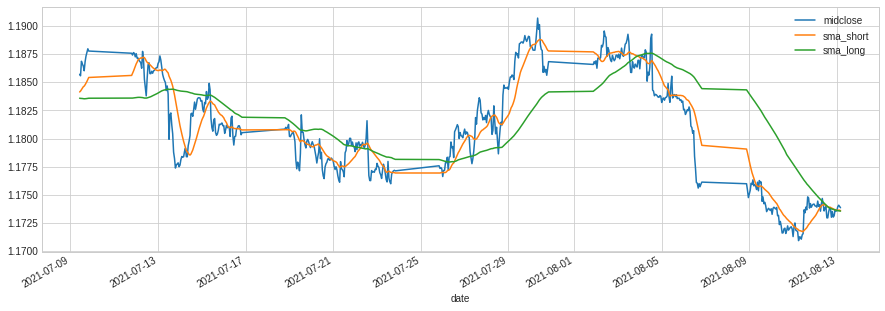

In [5]:
data[['midclose', 'sma_short', 'sma_long']].iloc[-600:].plot(figsize=(15,5))
plt.show()

In [6]:
backtester = IterativeBacktester(data=data, signals=data['signal'], freq='H1')
backtester.backtest()

  0%|          | 0/9900 [00:00<?, ?it/s]

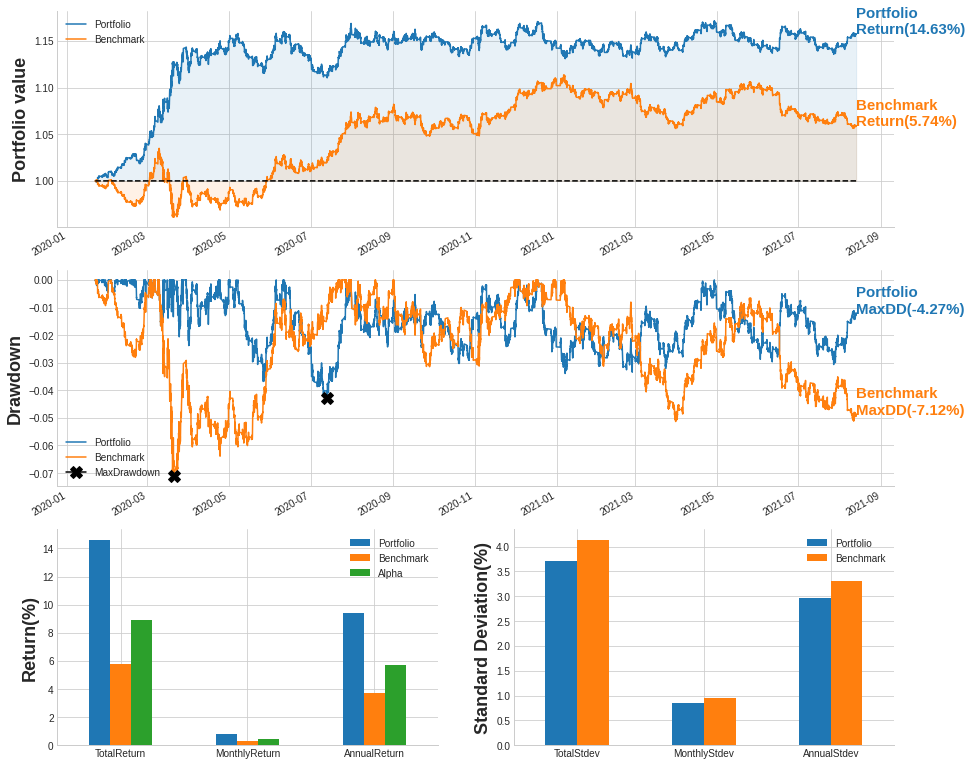

--------------------------------------------------
Data length: |569 days 06:00:00|
Data range from |2020-01-21 22:00:00| to |2021-08-13 04:00:00|
--------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      14.626 │       5.745 │   8.881 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │       0.781 │       0.307 │   0.475 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │       9.378 │       3.684 │   5.694 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │       3.714 │       4.141 │
├────────────

In [7]:
backtester.results()